# Generate vapor pressure data for hexane

An helper-notebook to generate data for parameter adjustment example. Uses data for hexane from the [NIST WebBook](https://webbook.nist.gov/chemistry/fluid/) and applies artifical noise.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_palette('Dark2')
sns.set_style('ticks')

In [105]:
# Taken from NIST WebBook
data = pd.read_csv("data/vle_data.csv", delimiter="\t")
data.head()

,Temperature (K),Pressure (bar),"Density (l, kg/m3)","Volume (l, m3/kg)","Internal Energy (l, kJ/mol)","Enthalpy (l, kJ/mol)","Entropy (l, J/mol*K)","Cv (l, J/mol*K)","Cp (l, J/mol*K)","Sound Spd. (l, m/s)",...,"Volume (v, m3/kg)","Internal Energy (v, kJ/mol)","Enthalpy (v, kJ/mol)","Entropy (v, J/mol*K)","Cv (v, J/mol*K)","Cp (v, J/mol*K)","Sound Spd. (v, m/s)","Joule-Thomson (v, K/bar)","Viscosity (v, uPa*s)","Therm. Cond. (v, W/m*K)"
0,250.0,0.015229,697.23,0.001434,-17.983,-17.983,-60.956,138.32,180.84,1301.5,...,15.805,14.234,16.308,76.208,116.89,125.30,160.45,8.2140,5.2533,0.010233
1,251.0,0.016265,696.37,0.001436,-17.802,-17.802,-60.234,138.55,181.10,1296.7,...,14.855,14.350,16.432,76.158,117.23,125.64,160.74,8.1241,5.2745,0.010299
2,252.0,0.017361,695.51,0.001438,-17.621,-17.621,-59.513,138.77,181.37,1292.0,...,13.971,14.467,16.557,76.113,117.57,125.98,161.03,8.0350,5.2957,0.010366
3,253.0,0.018519,694.64,0.001440,-17.440,-17.439,-58.795,139.00,181.63,1287.2,...,13.148,14.584,16.682,76.073,117.91,126.33,161.31,7.9468,5.3168,0.010433
4,254.0,0.019743,693.78,0.001441,-17.258,-17.258,-58.078,139.23,181.90,1282.5,...,12.380,14.701,16.807,76.036,118.25,126.68,161.60,7.8594,5.3380,0.010500


In [106]:
n = len(data)

# apply noise to data
percent_uncertainty = 0.05
data_gaussian = np.random.normal(data["Pressure (bar)"], data["Pressure (bar)"] * percent_uncertainty)

# add outliers
percent_outliers = 0.1
for i in np.random.randint(0, n + 1, int(n * percent_outliers)):
    data_gaussian[i] = np.random.normal(data_gaussian[i], data_gaussian[i] * 0.4)

In [107]:
psat_data = pd.DataFrame(
    np.array([data["Temperature (K)"].values, data_gaussian]).T, 
    columns=["temperature / K", "vapor_pressure / bar"]
)

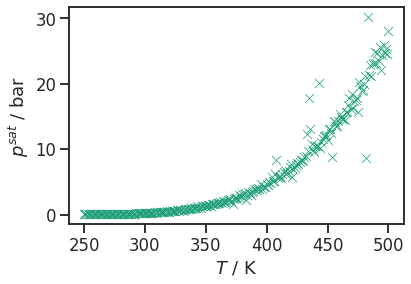

In [108]:
sns.scatterplot(data=psat_data, x="temperature / K", y="vapor_pressure / bar", marker="x");
plt.ylabel(r"$p^{sat}$ / bar")
plt.xlabel(r"$T$ / K");

# Liquid density data

In [111]:
# Taken from NIST WebBook
data = pd.read_csv("data/liquid_data.csv", delimiter="\t")
data.head()

,Temperature (K),Pressure (bar),Density (kg/m3),Volume (m3/kg),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/bar),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase
0,350.0,3.0,605.52,0.001651,1.7158,1.7584,5.0021,168.62,216.40,849.15,-0.027111,187.21,0.10572,liquid
1,350.0,4.0,605.69,0.001651,1.7074,1.7643,4.9782,168.62,216.35,850.34,-0.027190,187.48,0.10578,liquid
2,350.0,5.0,605.87,0.001651,1.6991,1.7702,4.9544,168.62,216.30,851.52,-0.027269,187.75,0.10584,liquid
3,350.0,6.0,606.05,0.001650,1.6908,1.7761,4.9306,168.62,216.25,852.70,-0.027347,188.02,0.10590,liquid
4,350.0,7.0,606.22,0.001650,1.6825,1.7820,4.9069,168.62,216.20,853.88,-0.027424,188.29,0.10596,liquid


In [118]:
n = len(data)

# apply noise to data
percent_uncertainty = 0.01
data_gaussian = np.random.normal(data["Density (kg/m3)"], data["Density (kg/m3)"] * percent_uncertainty)

# add outliers
percent_outliers = 0.1
for i in np.random.randint(0, n, int(n * percent_outliers)):
    data_gaussian[i] = np.random.normal(data_gaussian[i], data_gaussian[i] * 0.03)
    
rho_liq_data = pd.DataFrame(
    np.array([data["Temperature (K)"].values, data["Pressure (bar)"].values, data_gaussian]).T, 
    columns=["temperature / K", "pressure / bar", "density / kg/m3"]
)

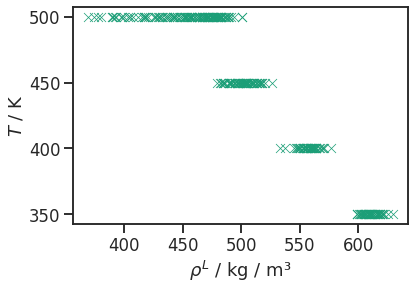

In [119]:
sns.scatterplot(data=rho_liq_data, y="temperature / K", x="density / kg/m3", marker="x");
plt.xlabel(r"$\rho^{L}$ / kg / m³")
plt.ylabel(r"$T$ / K");

## Store data

In [120]:
psat_data.to_csv('data/hexane_vapor_pressure.csv', index=False)
rho_liq_data.to_csv('data/hexane_liquid_density.csv', index=False)